# Predicting Student exams success based on lifestyle factors

<h4>Introduction</h4>
In this demo we will explore how to use various classification modules to predict whether a student will pass an exams based on serveral lifestyle and academic factors.<br>This problem is relatable and interesting because it deals with student performing something that most people have experienced.<br>
<br>
<p>We will use the following classification modules: </p>
<ul>
    <li>K-Nearest Neighbors.</li>
    <li>Logistics Regression</li>
    <li>Decision Tree</li>
    <li>Random Forest</li>
</ul>
<p>We will also visualise the decision tree to understand how it makes decisions base on input features</p>

<h2>Data Creation</h2>
<p>We will create a synthetic data with the following features: </p>
<ul>
    <li>StudyHours: The number of hours a student studies in a week</li>
    <li>SleepHour: Average hours of sleep per a night</li>
    <li>ClassAttendance: Percentage of class attended by a students</li>
    <li>PerviousGrad: Grade from previous exams (0 - 100 scale)</li>
    <li>Extracurricular: Other activities student does, that is not mainly academic</li>
    <li>SocialMediaUsage: Amount of time a students spends on social media</li>
    <li>PartTimeJob: A business activities that a students is involved in aside schooling.</li>
</ul>                                                        

<h2>Importing of libraries</h2>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Generating of Synthetic Datasets</h2>

In [4]:
# Set a random speed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Generating features
studyHour = np.random.normal(20, 5, n_samples).clip(5, 35)
sleepHour = np.random.normal(7, 1.5, n_samples).clip(4, 10)
classAttendance = np.random.normal(85, 10, n_samples).clip(50, 100)
previousGrade = np.random.normal(75, 15, n_samples).clip(40, 100)
extracarricular = np.random.poisson(2, n_samples)
socialMediaUsage = np.random.normal(3, 1, n_samples).clip(0, 6)
partTimeJob = np.random.binomial(1, 0.3, n_samples)

# Creating a dataFrame
df = pd.DataFrame({
    'studyHour':studyHour,
    'sleepHour':sleepHour,
    'classAttendance':classAttendance,
    'previousGrade':previousGrade,
    'extracarricular':extracarricular,
    'socialMediaUsage':socialMediaUsage,
    'partTimeJob':partTimeJob
})

# Adjust linear combination
linear_combination = (
    0.3 * df['studyHour'] +
    0.2 * df['sleepHour'] +
    0.3 * df['classAttendance'] +
    0.2 * df['previousGrade'] -
    0.2 * df['socialMediaUsage'] -
    0.3 * df['partTimeJob'] +
    np.random.normal(0, 5, n_samples) - 
    100 # Substracte 100 to the center around Zero
)

# Adjusted Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x / 15)) # Adjust the scaling factor

probabilities = sigmoid(linear_combination)

In [5]:
# Visualize the probabilities
# plt.hist(probabilities, bins=50)
# plt.title ( ' Distributions of Probabilities')
# plt.xlabel('Probability')
# plt.ylabel('Frequency')
# plt.show()

# Generate the pass target variables
threshold = 0.025
df['Pass'] = np.where(probabilities > threshold, 1, 0)

# Verifying the distribution of 'Pass' and 'Fail'
print(df['Pass'].value_counts())

Pass
1    321
0    179
Name: count, dtype: int64


In [6]:
df.head(10)

,studyHour,sleepHour,classAttendance,previousGrade,extracarricular,socialMediaUsage,partTimeJob,Pass
0,22.483571,8.389266,98.993554,86.675416,1,5.281652,0,1
1,19.308678,9.864125,94.246337,66.732214,1,2.382358,1,1
2,23.238443,4.902149,85.596304,62.727017,2,1.464960,0,1
3,27.615149,7.844454,78.530632,74.949383,3,1.119990,0,0
4,18.829233,6.024036,91.982233,72.447231,3,3.712712,0,1
5,18.829315,6.269312,88.934854,68.201579,0,1.116850,1,0
6,27.896064,6.111409,93.951932,85.445812,1,2.627681,1,1
7,23.837174,5.704014,91.351718,89.329578,1,3.437313,0,1
8,17.652628,7.072782,95.495527,76.326103,4,3.185176,0,1
9,22.712800,5.753575,79.647648,97.162951,1,3.425445,1,1


<H2>EXPLORATORY DATA ANALYSIS</H2>
<p>A brief EDA of the datasets</p>

        studyHour   sleepHour  classAttendance  previousGrade  extracarricular  socialMediaUsage  partTimeJob        Pass
count  500.000000  500.000000       500.000000     500.000000       500.000000        500.000000   500.000000  500.000000
mean    20.027287    7.044368        85.694208      75.290599         1.988000          3.061673     0.290000    0.642000
std      4.866174    1.418767         9.400030      13.959923         1.394182          1.044014     0.454216    0.479892
min      5.000000    4.000000        56.037446      40.000000         0.000000          0.070551     0.000000    0.000000
25%     16.498463    6.107062        78.975704      65.820958         1.000000          2.271874     0.000000    0.000000
50%     20.063986    7.042797        86.198058      74.866300         2.000000          3.077650     0.000000    1.000000
75%     23.183916    7.976863        92.547384      85.496541         3.000000          3.759129     1.000000    1.000000
max     35.000000   10.0

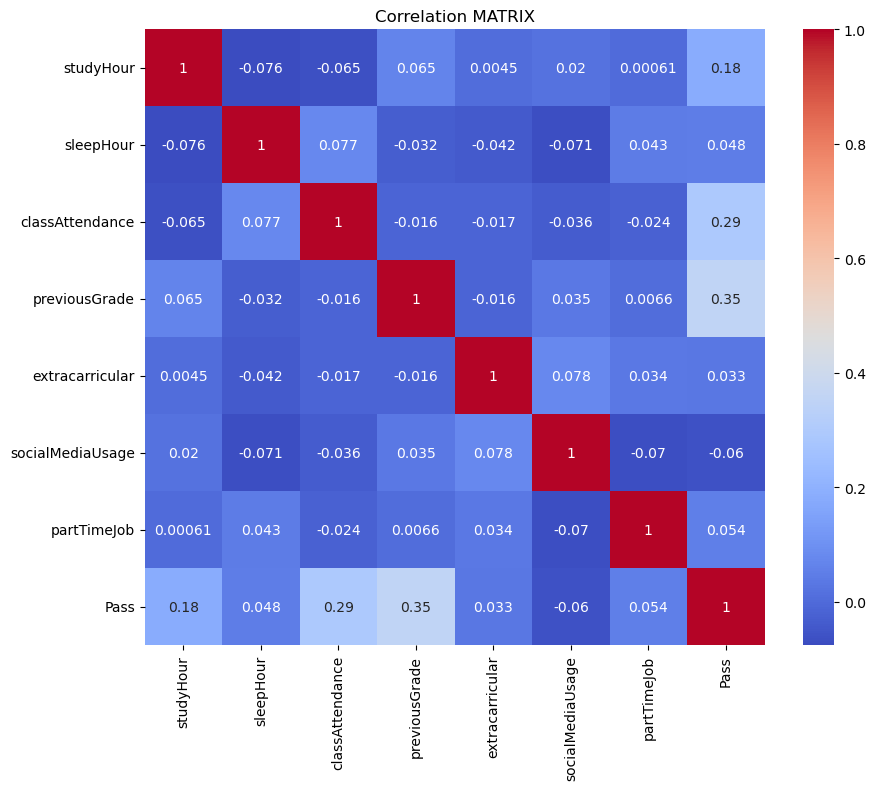

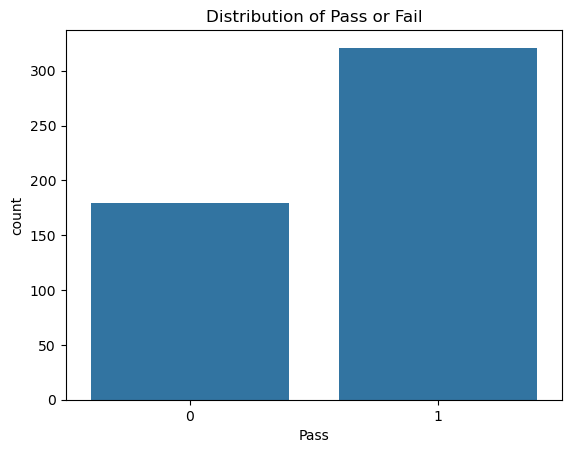

In [7]:
# Summary statistics
print(df.describe())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation MATRIX')
plt.show()

# Distribution of the target variable
sns.countplot(x='Pass',data=df)
plt.title('Distribution of Pass or Fail')
plt.show()

<h2>DATA PREPROCESSING</h2>
<ul>
    <li>Feature Scaling: We'll use a standardscaler for scaling features.</li>
    <li>Train-Test Split: We'll split data into training and testing sets.</li>
</ul>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and Targets
x = df.drop('Pass',axis=1)
y = df['Pass']

# Train-Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# KNN

KNN Acccuracy:  0.66
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.37      0.47        41
           1       0.66      0.86      0.75        59

    accuracy                           0.66       100
   macro avg       0.66      0.62      0.61       100
weighted avg       0.66      0.66      0.63       100



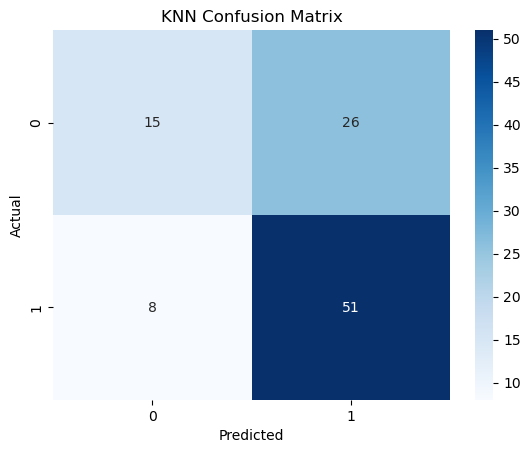

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the model
knn.fit(x_train_scaled, y_train)

# Make a Prediction
y_pred_knn = knn.predict(x_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print(f"KNN Acccuracy: {accuracy_knn: .2f}")

# Classification Report
print("Classification Report:\n",classification_report(y_test,y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True, fmt='d',cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()